# Marcel Afandi
# PYTN-KS12-018

## Tugas Assignment 3

In [62]:
#Untuk data prepocessing
import pandas as pd
import numpy as np 

#Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Membagi data untuk Train dan Test
from sklearn.model_selection import train_test_split

# Untuk mengencode/membuat nilai categorical dataset menjadi kode angka 
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler

# Untuk membangun model
from sklearn.linear_model import LogisticRegression # Logistic Regresion Model
from sklearn.neighbors import KNeighborsClassifier # KNN model
from sklearn.svm import SVC #Suport vector Machine
from sklearn import svm #Suport vector Machine
from sklearn.tree import DecisionTreeClassifier # Decission Tree Model
from sklearn.ensemble import RandomForestClassifier # Random Forest Model
from sklearn.naive_bayes import GaussianNB # Naive Bayes Model

# Untuk mengevaluasi Model
from sklearn.metrics import accuracy_score # Untuk melakukan akurasi model
from sklearn.metrics import confusion_matrix # Untuk COnfusion Matrix
from sklearn.metrics import classification_report # Untuk melihat report model

In [63]:
data = pd.read_csv("D:\\\\semester 6\\satu\\Tgs Assignment\\data\\bank-additional\\bank-additional-full.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Eksplorasi Data

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [65]:
data.shape

(41188, 21)

In [66]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [67]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

## Preparation Data

In [68]:
# Menghapus Data Unknown
df = data[data != 'unknown']
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [69]:
#Mengecek Apakah ada Missing Value
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [70]:
# Menghapus data kosong
data = df.dropna()

In [71]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [72]:
data.duplicated().sum()

10

In [73]:
# Menghapus data duplikat
df = data.drop_duplicates()

In [74]:
df.duplicated().sum()

0

## Data Visualization

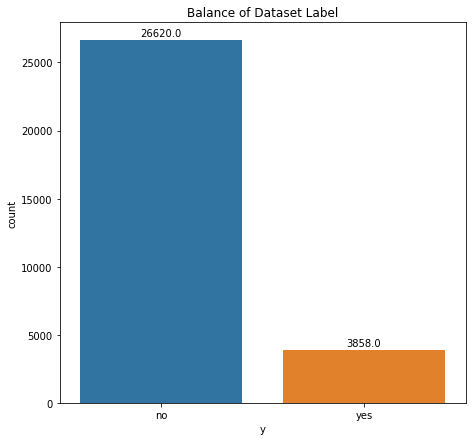

In [75]:
# Dari plot data dibawah dapat disimpulkan bahwa jumlah nasabah yang tidak memenuhi kriteria lebih banyak 
plt.rcParams['figure.figsize']=(16,7)
plt.subplot(121)
plt.title("Balance of Dataset Label")
ax = sns.countplot(x='y', data=df)
for i in ax.patches:
    ax.annotate(format(i.get_height(),'0.1f'), (i.get_x() + i.get_width()/2.,i.get_height()),
               ha='center', va='center', xytext=(0,7), textcoords='offset points')

Text(0.5, 1.0, 'Pekerjaan yang paling banyak')

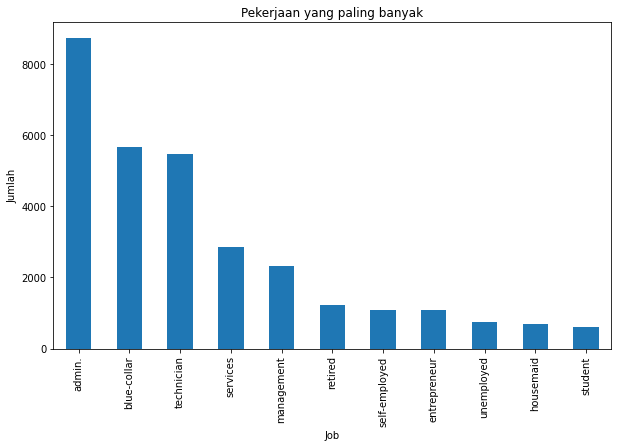

In [76]:
# Dari plot dibawah ini dapat dilihat pekerjaan admin adalah yang paling banyak
df['job'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Bar Chart of Job')
plt.xlabel('Job')
plt.ylabel('Jumlah')
plt.title('Pekerjaan yang paling banyak')

Text(0.5, 1.0, 'Persentage of Marital Status')

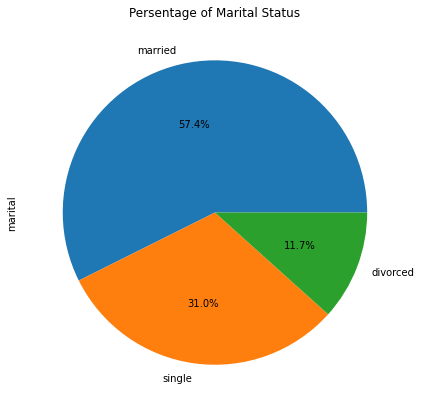

In [77]:
# Nasabah yang sudah menikah paling banyak
data['marital'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentage of Marital Status')

## Data Preprocessing

In [78]:
#melakukakn encode variabel kategorikal dengan label encoder
object_cols = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome','y']
label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12240\1060322224.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_encoder.fit_transform(df[col])


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [79]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [80]:
# Bagi/Split data untuk train dan test
y = df.iloc[:,-1]
X = df.iloc[:,0:20]

In [81]:
train,test = train_test_split(df,test_size = 0.2 ,random_state = 1)
X_train = train.drop(labels='y',axis=1)
y_train = train['y']
X_test  = test.drop(labels='y',axis=1)
y_test  = test['y']

## Modelling

### 1. Logistic Regression

In [82]:
#bulding and fitting Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
pred1 = model.predict(X_test)
confusion_matrix(y_test, pred1)

array([[5210,  151],
       [ 447,  288]], dtype=int64)

In [84]:
print("Logistic Regression Accuracy : ",
      accuracy_score(y_test,pred1))

Logistic Regression Accuracy :  0.9019028871391076


In [85]:
pred1 = model.predict(X_test)
print(accuracy_score(y_test, pred1))
matrix1 = confusion_matrix(y_test, pred1)
print(matrix1)

0.9019028871391076
[[5210  151]
 [ 447  288]]


<function matplotlib.pyplot.show(close=None, block=None)>

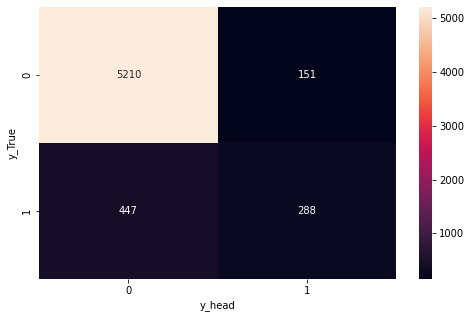

In [86]:
#memvisualisasikan confusion matrix model Logistic Regression 
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix1, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [87]:
# Mengukur Performa dari model Logistic Regression
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5361
           1       0.66      0.39      0.49       735

    accuracy                           0.90      6096
   macro avg       0.79      0.68      0.72      6096
weighted avg       0.89      0.90      0.89      6096



Dari Report diatas recall hanya diangka 0.39 

### 2. K-Nearest Neighbors

In [88]:
knn = KNeighborsClassifier()

In [89]:
m2 = KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance')

In [90]:
m2.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [91]:
# Mengecheck akurasi dari SVM model dengan data test
print('KNN Accuracy : ', m2.score(X_test, y_test))

KNN Accuracy :  0.9027230971128609


In [92]:
pred2 = m2.predict(X_test)
print(accuracy_score(y_test, pred2))
mtx2 = confusion_matrix(y_test, pred2)
mtx2

0.9027230971128609


array([[5101,  260],
       [ 333,  402]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

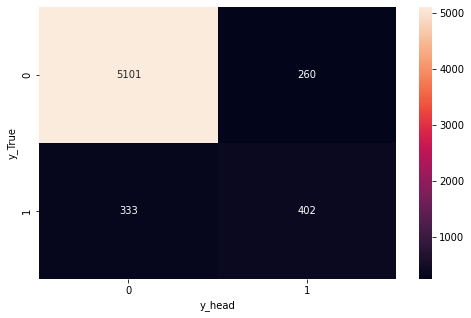

In [93]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(mtx2, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [94]:
# Mengecek performa matrix dengan KNN model
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      5361
           1       0.61      0.55      0.58       735

    accuracy                           0.90      6096
   macro avg       0.77      0.75      0.76      6096
weighted avg       0.90      0.90      0.90      6096



pada nilai recall meningkat menjadi 0.55 menjadi nilai yang paling tinggi sementara

### 3. Support Vector Machine

In [95]:
model_svm = SVC()

In [99]:
model_svm = DecisionTreeClassifier(criterion='entropy',max_depth=100)
model_svm.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [100]:
# Mengecheck akurasi dari SVM model dengan data test
print('SVM Test Accuracy : ', model_svm.score(X_test, y_test))

SVM Test Accuracy :  0.8846784776902887


In [101]:
# Melihat confusion matrix SVM Model
pred3=model_svm.predict(X_test)
print(accuracy_score(y_test, pred3))
mtx3=confusion_matrix(y_test, pred3)
mtx3

0.8846784776902887


array([[4998,  363],
       [ 340,  395]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

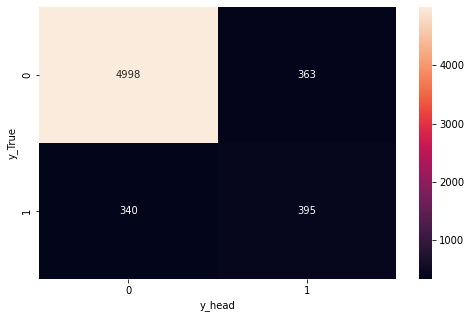

In [102]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(mtx3, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [103]:
# Mengecek performa matrix dengan SVM model
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5361
           1       0.52      0.54      0.53       735

    accuracy                           0.88      6096
   macro avg       0.73      0.73      0.73      6096
weighted avg       0.89      0.88      0.89      6096



Dari Percobaan SVM nilai recall malah semakin tidak bagus, didapatkan angka 0.23 yang mana dibawah Logistic Regression dan K-Nearest Neighbors

## 4. Decision Tree

In [104]:
decTree = DecisionTreeClassifier()

In [105]:
decisionTree = DecisionTreeClassifier(criterion='entropy',max_depth=100)
decisionTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [106]:
# Mengecheck akurasi dari Decision Tree model dengan data test
print('Decision Tree Test Accuracy : ', decisionTree.score(X_test, y_test))

Decision Tree Test Accuracy :  0.885498687664042


In [107]:
#Mengecek confusion matrix dari Decision Tree Model
pred4 = decisionTree.predict(X_test)
print(accuracy_score(y_test, pred4))
matrix4 = confusion_matrix(y_test, pred4)
print(matrix4)

0.885498687664042
[[4998  363]
 [ 335  400]]


<function matplotlib.pyplot.show(close=None, block=None)>

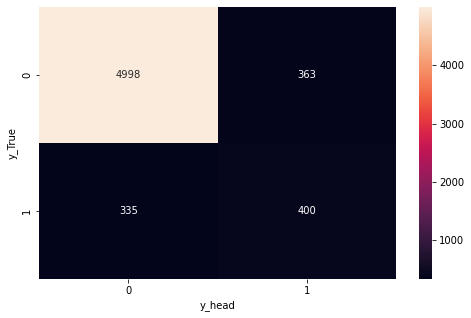

In [108]:
# Melakukan visualisasi Decision Tree 
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(matrix4, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [109]:
# Mengecek performa dari Decision Tree
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      5361
           1       0.52      0.54      0.53       735

    accuracy                           0.89      6096
   macro avg       0.73      0.74      0.73      6096
weighted avg       0.89      0.89      0.89      6096



Pada penggunaan DEcision Tree nilai recall masih sedikit dibawah K_Nearest Neighbors

## 5. Random Forest

In [110]:
Rf = RandomForestClassifier(random_state=15)

In [111]:
md5 = RandomForestClassifier(criterion='entropy', max_features='auto', n_estimators=900)
md5.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=900)

In [112]:
# Mengecheck akurasi dari Decision Tree model dengan data test
print('Decision Tree Test Accuracy : ', md5.score(X_test, y_test))

Decision Tree Test Accuracy :  0.9096128608923885


In [113]:
#Mengecek confusion matrix dari Random Forest Model
pred5 = md5.predict(X_test)
print(accuracy_score(y_test, pred5))
mx5 = confusion_matrix(y_test, pred5)
print(mx5)

0.9096128608923885
[[5159  202]
 [ 349  386]]


<function matplotlib.pyplot.show(close=None, block=None)>

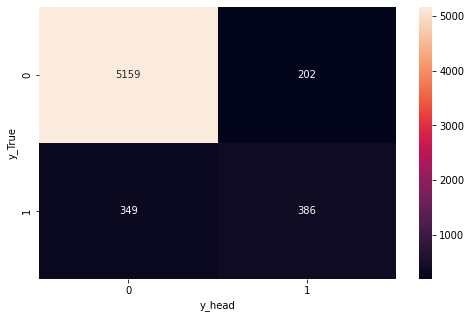

In [114]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(mx5, annot=True, fmt=".0f", ax=ax)
plt.xlabel('y_head')
plt.ylabel("y_True")
plt.show

In [115]:
# Mengecek performa dari model Random Forest
print(classification_report(y_test, pred5))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5361
           1       0.66      0.53      0.58       735

    accuracy                           0.91      6096
   macro avg       0.80      0.74      0.77      6096
weighted avg       0.90      0.91      0.91      6096



Pada percobaan menggunakan random forest, nilai reccal masih dibawah KNN dan Decision Tree

### 6. Naive Bayes

In [116]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [117]:
#mengecek nilai akurasi dari model naive bayes denga test data
print('Test data accuracy', nb.score(X_test, y_test))

Test data accuracy 0.8333333333333334


In [118]:
pred6 = nb.predict(X_test)
print(accuracy_score(y_test, pred6))
matrix6 = confusion_matrix(y_test, pred6)
print(matrix6)

0.8333333333333334
[[4631  730]
 [ 286  449]]


In [119]:
# Mengecek performa dari Naive bayes 
print(classification_report(y_test, pred6))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5361
           1       0.38      0.61      0.47       735

    accuracy                           0.83      6096
   macro avg       0.66      0.74      0.69      6096
weighted avg       0.87      0.83      0.85      6096



Nilai recall pada naive bayes paling tinggi dari algortma lainnya namun belum tentu nilai akurasinya lebih tinggi

# Kesimpulan

In [120]:
print("Accuracy for Logistic Regression : ",
      accuracy_score(y_test,pred1))
print("Accuracy for KNN                 : ",
      accuracy_score(y_test,pred2))
print("Accuracy for SVM                 : ",
       accuracy_score(y_test,pred3))
print("Accuracy for Decision Tree       : ",
      accuracy_score(y_test,pred4))
print("Accuracy for Random Forest       : ",
      accuracy_score(y_test,pred5))
print("Accuracy for Naive Bayes         : ",
      accuracy_score(y_test, pred6))

Accuracy for Logistic Regression :  0.9019028871391076
Accuracy for KNN                 :  0.9027230971128609
Accuracy for SVM                 :  0.8846784776902887
Accuracy for Decision Tree       :  0.885498687664042
Accuracy for Random Forest       :  0.9096128608923885
Accuracy for Naive Bayes         :  0.8333333333333334


Dari Building, Fitting dan Training data yang sudah dilakukan, maka didapatkan nilai akurasi yang terbaik yaitu model Random Forest dengan nilai akurasi 0.9096 hampir sempurna menjadi 1